<a href="https://colab.research.google.com/github/niedakaito/EU_M_Math/blob/main/Chap09_Ex_02_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

# 練習問題 9-1

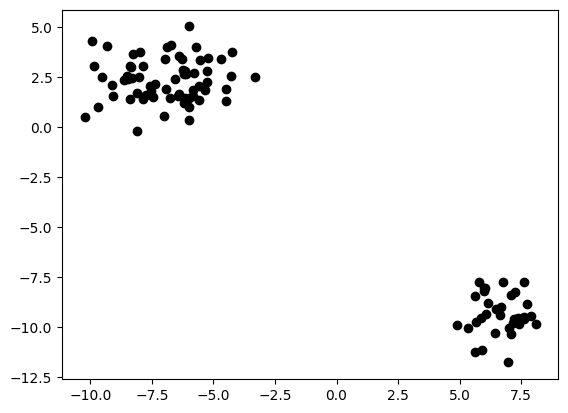

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state = 52)

plt.scatter(X[:,0], X[:, 1], color = 'black')

# 練習問題 9-2

In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()

sc = StandardScaler()
sc.fit(iris.data)
X_std = sc.transform(iris.data)

# 主成分分析の実行
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前のデータ次元:{}'.format(iris.data.shape))
print('主成分分析後のデータ次元:{}'.format(X_pca.shape))

主成分分析前のデータ次元:(150, 4)
主成分分析後のデータ次元:(150, 2)


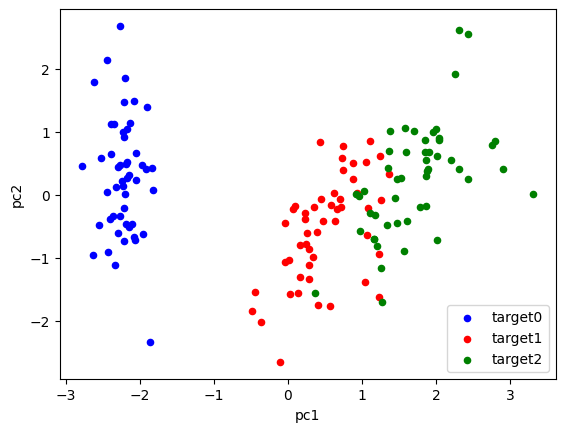

In [10]:
merge_data = pd.concat([pd.DataFrame(X_pca[:,0]), pd.DataFrame(X_pca[:,1]),pd.DataFrame(iris.target)], axis=1)

merge_data.columns = ['pc1', 'pc2', 'target']

ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('target'):
  ax = data.plot.scatter(x = 'pc1', y = 'pc2', color = colors[i],
  label = f'target{i}', ax=ax)